# 載入資料

In [9]:
import pandas as pd
import keras
import os
import matplotlib.pyplot as plt
import numpy as np

os.environ['CUDA_VISIBLE_DEVICES'] = ''

train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')


# 紀錄train label及test data id
train_label = train_data['label']
test_id = test_data['id']

# 將ID欄位去除
train_data.drop(columns='label',inplace=True)
test_data.drop(columns='id',inplace=True)

print(train_data.head())
print('train data size:',train_data.shape)
print('test data size:',test_data.shape)

# image normalized
train_data = train_data / 255
test_data = test_data / 255

# reshape data size
train_x = train_data.values.reshape(train_data.shape[0],28,28,1)
train_y = np.array(pd.get_dummies(train_label))
test_x = test_data.values.reshape(test_data.shape[0],28,28,1)

print(test_id)

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

# 圖像檢視

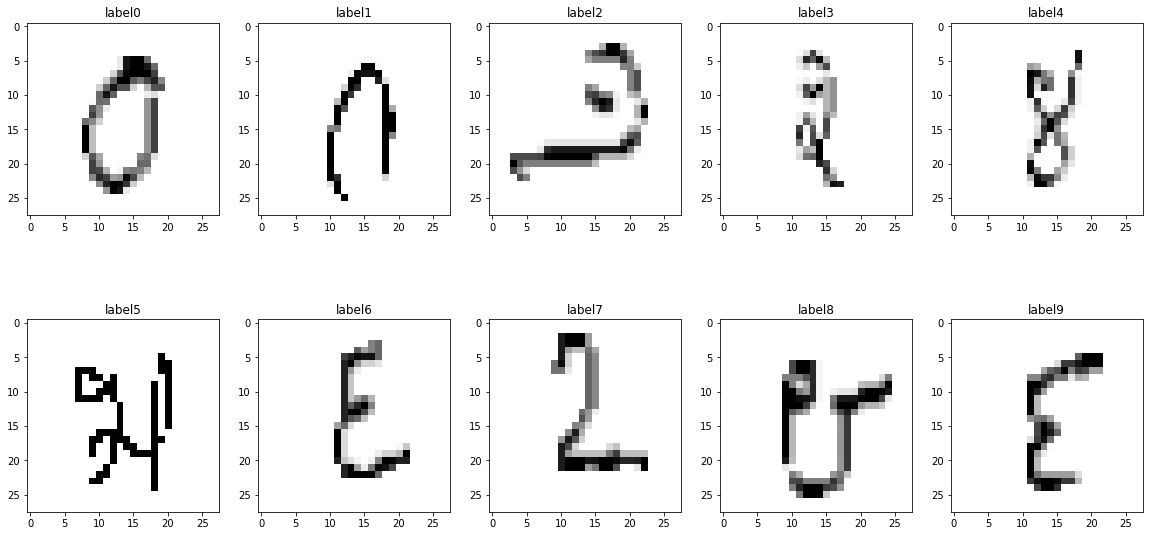

In [10]:
#print(train_data.loc[0])

plt.figure(figsize=(20,10))
for i in range(10):
    img_data = np.array(train_data.loc[i])
    img_data = np.reshape(img_data,(28,28))
    plt.subplot(2,5,i+1)
    plt.title('label'+str(train_label.loc[i]))
    plt.imshow(img_data,cmap='binary')
plt.show()


# 建立模型

In [11]:
layer_list = [keras.layers.Conv2D(50,kernel_size=(5,5),input_shape=(28,28,1),activation='relu'),
             keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
             keras.layers.MaxPool2D(2,2),
             keras.layers.Conv2D(30,kernel_size=(3,3),activation='relu'),
             keras.layers.MaxPool2D(2,2),
             keras.layers.Flatten(),
             keras.layers.Dense(50,activation='relu'),
             keras.layers.Dense(train_y.shape[1],activation='sigmoid')]

model = keras.models.Sequential(layer_list)
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'],
             )

model.summary()
training_process = model.fit(train_x,train_y,
                            epochs=50,
                            validation_split=0.2,
                            shuffle=True)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 50)        1300      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 50)        22550     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 50)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 30)          13530     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 480)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)               

48000/48000 [==============================] - 11s 225us/step - loss: 4.8782e-04 - accuracy: 0.9999 - val_loss: 0.0249 - val_accuracy: 0.9974
Epoch 46/50
48000/48000 [==============================] - 10s 214us/step - loss: 4.1502e-04 - accuracy: 0.9999 - val_loss: 0.0105 - val_accuracy: 0.9990
Epoch 47/50
48000/48000 [==============================] - 10s 206us/step - loss: 3.0002e-04 - accuracy: 0.9999 - val_loss: 0.0145 - val_accuracy: 0.9988
Epoch 48/50
48000/48000 [==============================] - 10s 214us/step - loss: 5.8540e-04 - accuracy: 0.9998 - val_loss: 0.0153 - val_accuracy: 0.9984
Epoch 49/50
48000/48000 [==============================] - 10s 208us/step - loss: 1.4189e-04 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy: 0.9985
Epoch 50/50
48000/48000 [==============================] - 10s 212us/step - loss: 3.5153e-04 - accuracy: 0.9999 - val_loss: 0.0135 - val_accuracy: 0.9985


# 繪製acc, loss圖

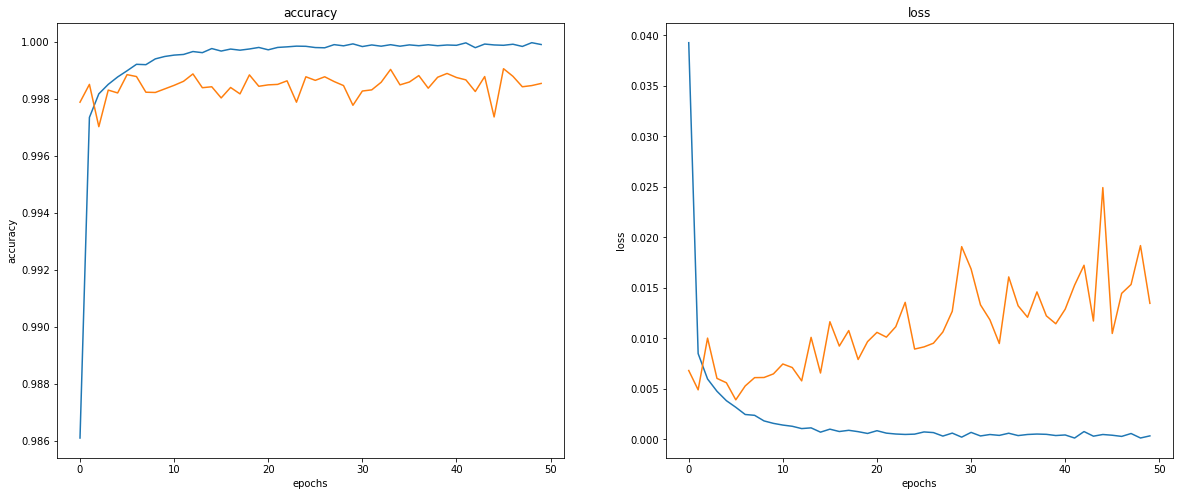

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(training_process.history['accuracy'],label='train')
plt.plot(training_process.history['val_accuracy'],label='val')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(1,2,2)
plt.plot(training_process.history['loss'],label='train')
plt.plot(training_process.history['val_loss'],label='val')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()

# 測試及輸出結果

In [13]:
# 測試資料預測
pred = model.predict(test_x)
predict_test_y = pd.DataFrame(np.argmax(pred,axis=1))
predict_test_y.columns = ['label']

# 輸出結果
res = pd.concat([test_id,predict_test_y],axis=1)
res.to_csv('sample_submission.csv',index=False)
